# Probability Distributions and Gradient Descent
## Part 1: Probability Distributions
### Example
A study conducted on 1000 patients shows that the average time for a patient to develop septic shock after a particular surgery is 12 hours.
What is the probability a patient will go into septic shock:

    a. Within 3 hours after surgery?
    b. 6 hours after surgery?

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
mean_time_to_shock = 12  # hours
rate_parameter = 1 / mean_time_to_shock  # 1/hours

num_samples = 10000  # Number of simulated patients
times_to_shock = np.random.exponential(scale=mean_time_to_shock, size=num_samples)

In [14]:
# a. Probability of septic shock within the first 2 hours:
time_of_interest_a = 2  # hours
probability_shock_before_toi_a = np.mean(times_to_shock < time_of_interest_a)

print(f"a. Probability of septic shock before {time_of_interest_a} hours: {probability_shock_before_toi_a}")

a. Probability of septic shock before 2 hours: 0.149


In [15]:
# b. Probability of septic shock after 6 hours:
time_of_interest_b = 6  # hours
probability_shock_after_toi_b = np.mean(times_to_shock > time_of_interest_b)

print(f"b. Probability of septic shock after {time_of_interest_b} hours: {probability_shock_after_toi_b}")

b. Probability of septic shock after 6 hours: 0.6114


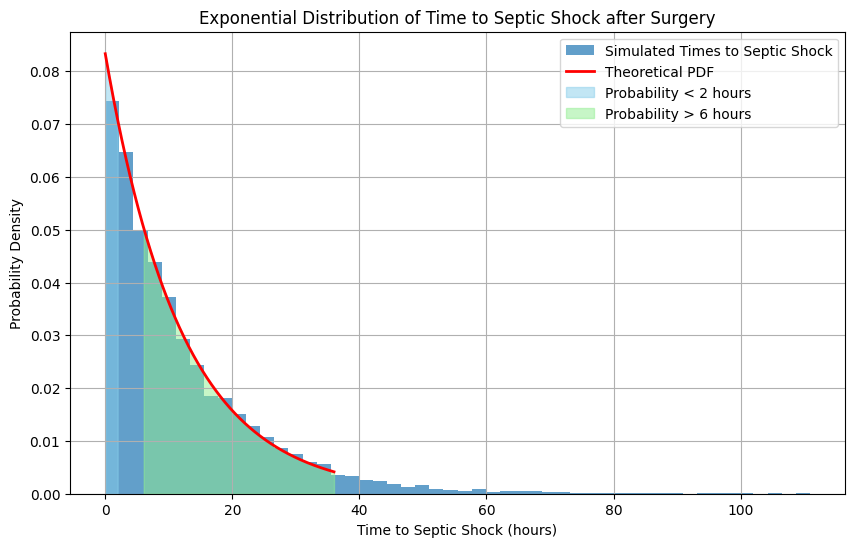

In [16]:
# Visualization (modified to show both probabilities)
plt.figure(figsize=(10, 6))
plt.hist(times_to_shock, bins=50, density=True, alpha=0.7, label="Simulated Times to Septic Shock")

x = np.linspace(0, 3 * mean_time_to_shock, 500)
pdf = rate_parameter * np.exp(-rate_parameter * x)
plt.plot(x, pdf, 'r-', linewidth=2, label="Theoretical PDF")

plt.xlabel("Time to Septic Shock (hours)")
plt.ylabel("Probability Density")
plt.title("Exponential Distribution of Time to Septic Shock after Surgery")
plt.legend()
plt.grid(True)

# Highlight areas for both probabilities
plt.fill_between(x, pdf, where=(x <= time_of_interest_a), color='skyblue', alpha=0.5, label=f"Probability < {time_of_interest_a} hours")
plt.fill_between(x, pdf, where=(x > time_of_interest_b), color='lightgreen', alpha=0.5, label=f"Probability > {time_of_interest_b} hours")

plt.legend()  # Update legend after fill_between calls

plt.show()

### Report Insights

A. *How does the distribution you were allocated vary from the other three you were not allocated?*

1. **Type Of Data:**
    - Exponential: Deals with continuous data, specifically time until an event occurs.
    - Normal: Also deals with continuous data, but it describes data that is symmetrically distributed around a mean.
    - Binomial: Deals with discrete data, specifically the number of successes in a fixed number of independent trials. 
    - Poisson: Deals with discrete data, specifically the number of events that occur in a fixed interval of time or space. It's used for counting events like the number of website visitors in an hour.
2. **Shape of Graph:**
    - Exponential: A reverse J-shaped distribution. It's highest at zero and decays exponentially.
    - Normal: A mountain-shapped, symmetrical distribution. It's centered around the mean, and the data is evenly distributed on either side.
    - Binomial: A mountain-shaped, likey assymetrical distribution. The symmetry and skewness depend on the probability of success.
    - Poisson: Also takes mountain-shape, but it's typically skewed to the right, especially when the average number of events is small.
3. **Use Cases:**
    - Exponential: Time until a patient develops a septic shock after surgery.
    - Normal: Heights of people.
    - Binomial: Number of tails in 5 coin flips.
    - Poisson: Number of emergency calls in an hour.

B. *Would the question you chose be used in the context of a different distribution?*

* **Normal Distribution:**  The normal distribution is inappropriate for this scenario for several reasons:
    - Time-to-event data is skewed:  Times until an event like septic shock are almost always positively skewed (more patients develop it sooner, fewer later). The normal distribution is symmetrical.
    - Time-to-event data is non-negative: Time cannot be negative. The normal distribution extends to negative infinity.
    - Conceptual mismatch: The normal distribution describes the distribution of measurements or values around a mean. It doesn't inherently model the Ttime until something happens.

* **Binomial Distribution:** The binomial distribution is used for counting the number of successes in a fixed number of trials.  It has nothing to do with time.  You could not reframe the septic shock scenario to fit a binomial distribution.  

* **Poisson Distribution:** The Poisson distribution counts the number of events that occur within a fixed interval of time or space.  While it's related to the exponential, it's not suitable for our specific scenario.  The Poisson distribution would be appropriate if you wanted to model the number of cases of septic shock that occur in a hospital per day or per month.
  
**In short:** The nature of the "time until" a patient develops septic shock makes it inherently a time-to-event problem.  The exponential distribution is designed specifically for this type of data.  The normal, binomial, and Poisson distributions are designed for different types of data and different scenarios.

## Part 2: Bayesian Probability
### Fraud Detection Using Bayesian Probability

we'll use **Bayesian probability** to detect fraudulent transactions. We'll start with a prior probability of fraud and update it step-by-step as we observe new evidence

## Step 1: Initial Observation (High Transaction Amount)

We start with the following probabilities:
- **Prior Probability of Fraud (\( P(F) \))**: 1% (0.01).
- **Likelihood of High Amount Given Fraud (\( P(T|F) \))**: 90% (0.90).
- **Likelihood of High Amount Given No Fraud (\( P(T|\neg F) \))**: 5% (0.05).

Using Bayes' theorem, we calculate the **posterior probability of fraud** given a high transaction amount.


In [ ]:
def bayes_update(prior, likelihood_fraud, likelihood_non_fraud):
    marginal_likelihood = (likelihood_fraud * prior) + (likelihood_non_fraud * (1 - prior))
    posterior = (likelihood_fraud * prior) / marginal_likelihood
    return posterior, marginal_likelihood

P_F = 0.01
P_T_given_F = 0.90
P_T_given_not_F = 0.05
posterior_T, P_T = bayes_update(P_F, P_T_given_F, P_T_given_not_F)
print(f"Step 1: Posterior after High Amount = {posterior_T:.4f}")

## Step 2: Second Observation (High-Risk Location)

Now, we observe that the transaction occurred in a **high-risk location**. We update our posterior probability using the previous posterior as the new prior.

The new probabilities are:
- **Likelihood of High-Risk Location Given Fraud (\( P(L|F) \))**: 80% (0.80).
- **Likelihood of High-Risk Location Given No Fraud (\( P(L|\neg F) \))**: 10% (0.10).

In [ ]:
P_L_given_F = 0.80
P_L_given_not_F = 0.10
posterior_L, P_L = bayes_update(posterior_T, P_L_given_F, P_L_given_not_F)
print(f"Step 2: Posterior after High-Risk Location = {posterior_L:.4f}")


## Step 3: Third Observation (Unusual Hours)

Finally, we observe that the transaction occurred **outside the user's usual spending hours**. We update the posterior probability again using the previous posterior as the new prior.

The new probabilities are:
- **Likelihood of Unusual Hours Given Fraud (\( P(H|F) \))**: 70% (0.70).
- **Likelihood of Unusual Hours Given No Fraud (\( P(H|\neg F) \))**: 5% (0.05).

In [ ]:
P_H_given_F = 0.70
P_H_given_not_F = 0.05
posterior_H, P_H = bayes_update(posterior_L, P_H_given_F, P_H_given_not_F)
print(f"Step 3: Posterior after Unusual Hours = {posterior_H:.4f}")